In [14]:

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import csv

import seaborn as sns

import statsmodels.formula.api as sm


#Below we let python read the two csv files here, one country data and one soccer data, respectively.

country=pd.read_csv("country.csv")
dictobj = csv.DictReader(open("country.csv"))


In [5]:
soccer=pd.read_csv("soccer.csv")
dictobj = csv.DictReader(open("soccer.csv"))

In [6]:
mergedsheet = pd.merge(country,
                    soccer,
                    on='Country')

In [13]:
print(mergedsheet)

            Country    2011GDP    2016GDP  GDP Log Change  2011 Inflation  \
0         Argentina    447.644    544.735        0.216893           9.775   
1           Austria    419.243    386.587       -0.077893           3.600   
2           Belgium    513.396    466.559       -0.091230           3.469   
3            Brazil   2,492.91   1,798.62       -0.278506           6.636   
4          Bulgaria     53.514      52.39       -0.021004           3.389   
5             China   7,298.15  11,232.11        0.539035           5.417   
6          Colombia    328.422    282.357       -0.140262           3.416   
7           Croatia     63.842     50.731       -0.205366           2.260   
8            Cyprus     24.949      19.81       -0.205980           3.486   
9    Czech Republic    215.265    195.328       -0.092616           1.929   
10          Denmark    333.238    306.734       -0.079535           2.757   
11            Egypt    235.719    332.349        0.409937          11.068   

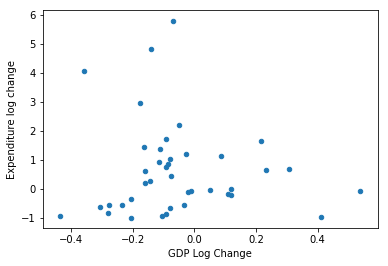

In [8]:
mergedsheet.plot(kind='scatter', x = 'GDP Log Change', y = 'Expenditure log change')
plt.show()

In [9]:
Y = mergedsheet['Expenditure log change']
X1 = mergedsheet['GDP Log Change']
X2 = mergedsheet['Inflation Log Change']
X3 = mergedsheet['Unemployment Log Change']
X4 = mergedsheet['Europe']
X5 = mergedsheet ['Asia']
X6 = mergedsheet ['America']


In [10]:
model = sm.ols(formula = 'Y ~ X1+ X2 + X3 + X4 + X5 + X6', data = mergedsheet).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.758
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.139
Time:                        15:58:17   Log-Likelihood:                -68.569
No. Observations:                  40   AIC:                             151.1
Df Residuals:                      33   BIC:                             163.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7678      0.855     -0.898      0.376      -2.507       0.971
X1            -0.5097      1.329     -0.383      0.704      -3.214       2.195
X2            -0.0181      0.268     -0.067      0.947      -0.562       0.526
X3            -1.5475      0.762     -2.031      0.050      -3.098       0.003
X4             1.5161      0.951      1.594      0.121      -0.419       3.451
X5             0.1704      1.103      0.155      0.878      -2.073       2.414
X6             2.2849      1.105      2.068      0.047       0.037       4.533
==============================================================================
Omnibus:                       21.289   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.292
Skew:                           1.606   Prob(JB):                     2.64e-07
Kurtosis:                       5.804   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

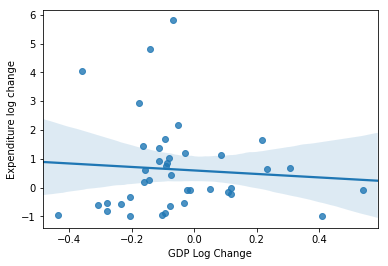

In [11]:
sns.regplot(data = mergedsheet, x = X1, y = Y)
plt.show()

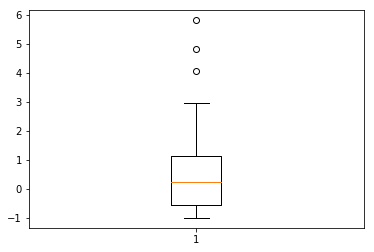

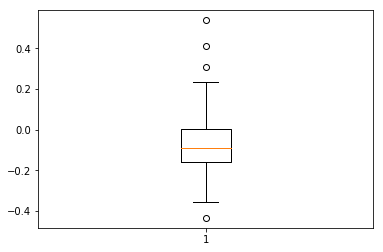

In [12]:
plt.boxplot(mergedsheet['Expenditure log change'])
plt.show()

plt.boxplot(mergedsheet['GDP Log Change'])
plt.show()

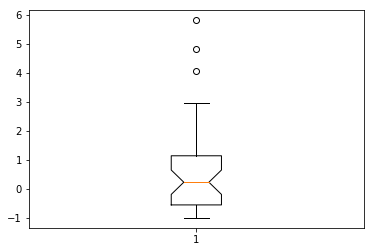

In [15]:
plt.boxplot(mergedsheet['Expenditure log change'], ['GDP Log Change'])
plt.show()